In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [12]:
# create a path
path = r'/Users/marcela/Library/CloudStorage/OneDrive-Personal/CF/Machine Learning/Achievement/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [13]:
# this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [14]:
# this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [16]:
# compile and run the model
# how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 40, 
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 590ms/step - accuracy: 0.6755 - loss: 0.1017 - val_accuracy: 0.5804 - val_loss: 0.1241
Epoch 2/40
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 518ms/step - accuracy: 0.7812 - loss: 0.0546

2024-08-17 05:28:04.071131: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


AttributeError: 'NoneType' object has no attribute 'items'

In [17]:
model.fit(
    train_generator, 
    epochs=40, 
    validation_data=test_generator,
)

Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 552ms/step - accuracy: 0.7345 - loss: 0.0865 - val_accuracy: 0.8170 - val_loss: 0.0658
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 544ms/step - accuracy: 0.8027 - loss: 0.0709 - val_accuracy: 0.7411 - val_loss: 0.1050
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.8521 - loss: 0.0548 - val_accuracy: 0.8170 - val_loss: 0.0760
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 529ms/step - accuracy: 0.8648 - loss: 0.0495 - val_accuracy: 0.8125 - val_loss: 0.0723
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 538ms/step - accuracy: 0.8305 - loss: 0.0581 - val_accuracy: 0.7545 - val_loss: 0.1025
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 582ms/step - accuracy: 0.8417 - loss: 0.0565 - val_accuracy: 0.7455 - val_loss: 0.0877
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 556ms/step - accuracy: 0.8786 - loss: 0.0440 - val_accuracy: 0.8259 - val_loss: 0.0741
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 535ms/step - accuracy: 0.8617 - loss: 0.0499 - val_accu

In [18]:
results = pd.DataFrame(model.history.history)

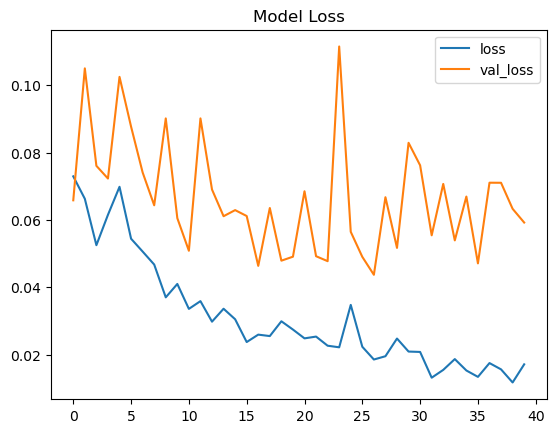

In [19]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

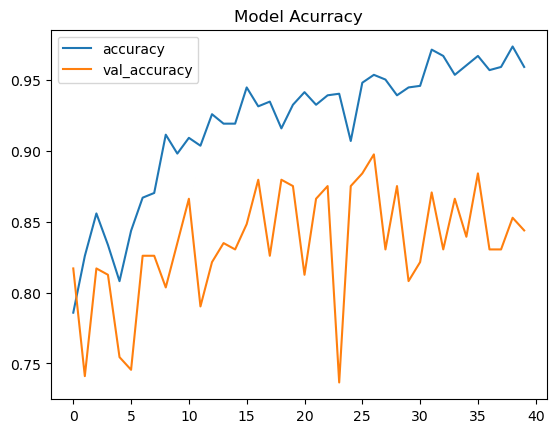

In [20]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [21]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9589345455169678, Val_Accuracy: 0.84375
Loss: 0.01714433915913105, Val_Loss: 0.05921914801001549


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


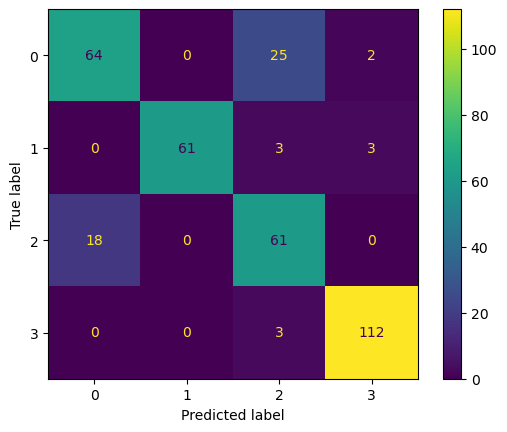

In [22]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


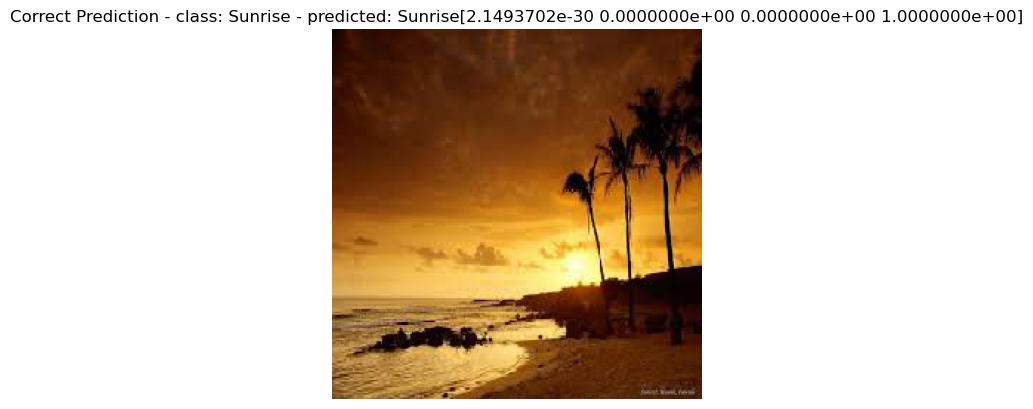

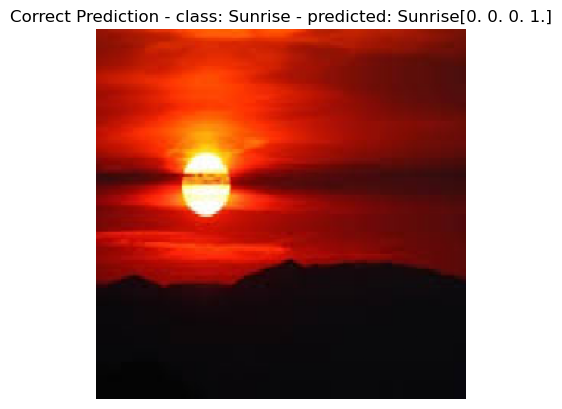

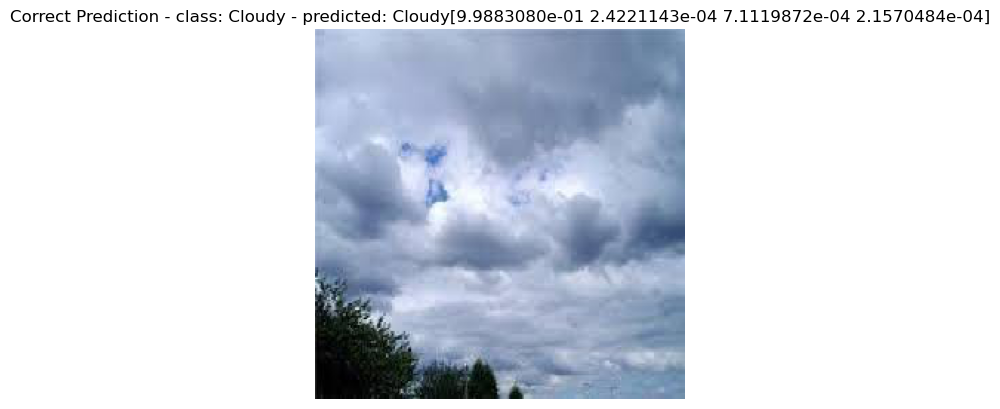

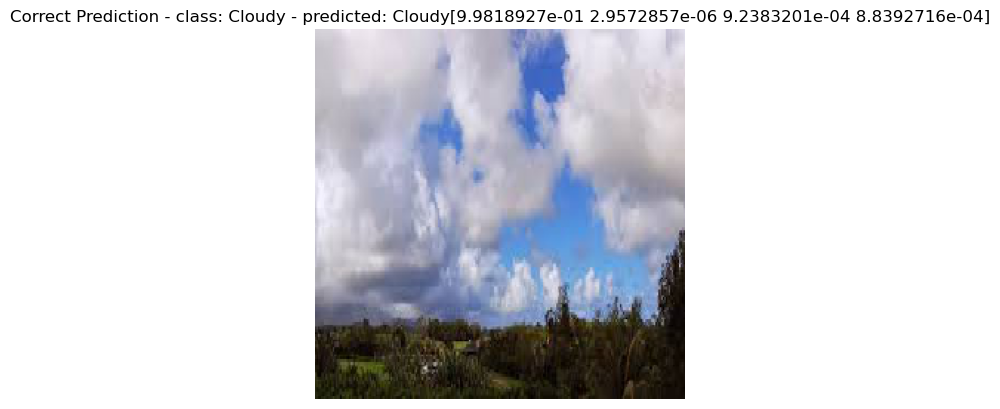

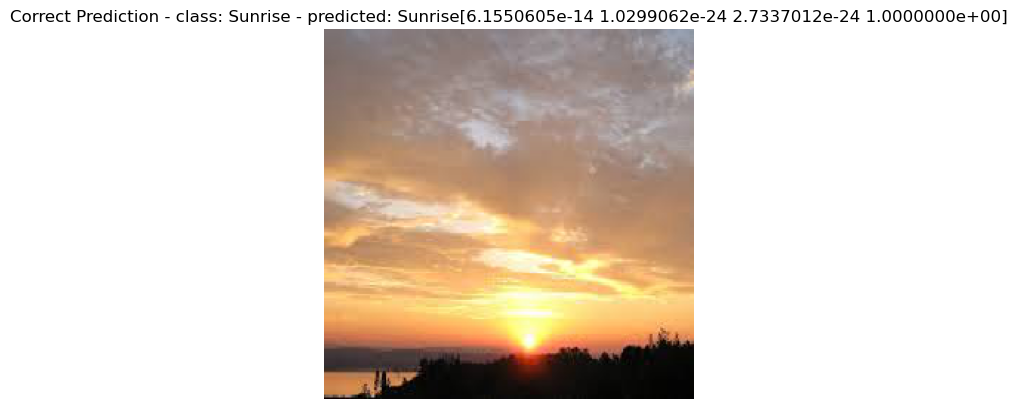

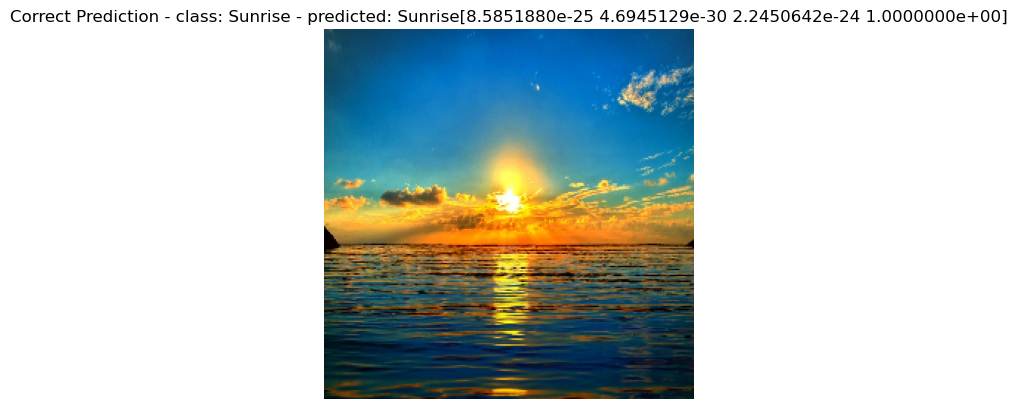

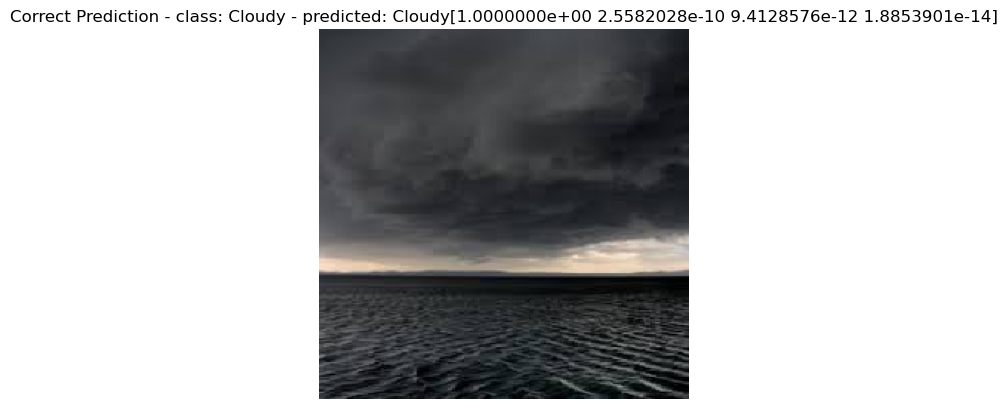

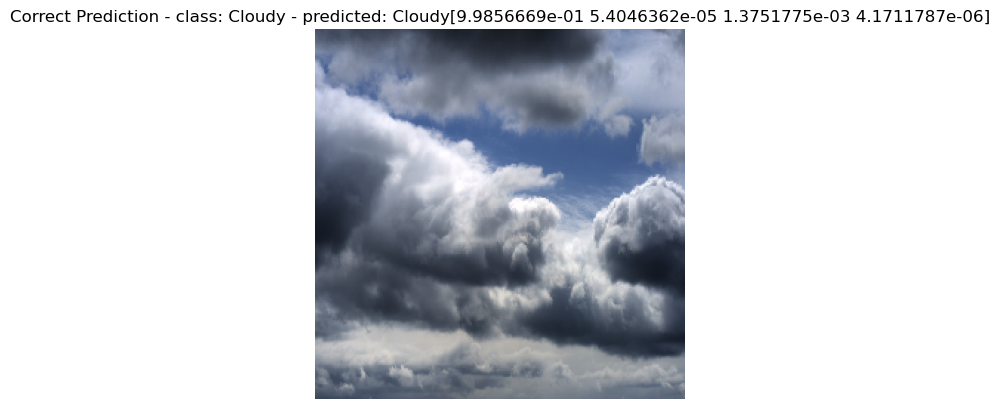

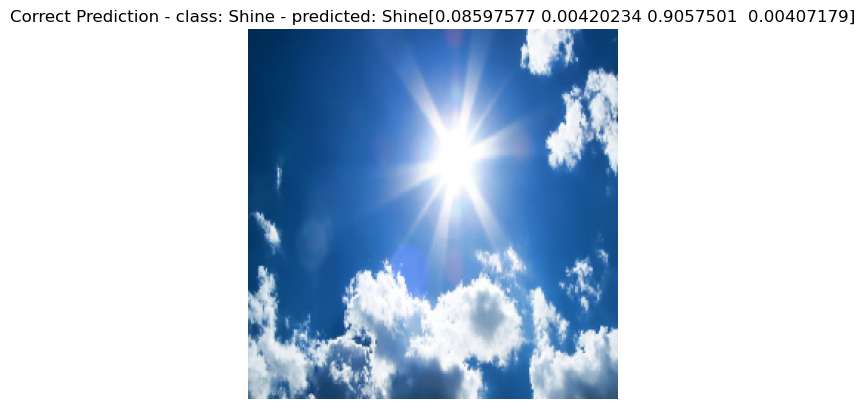

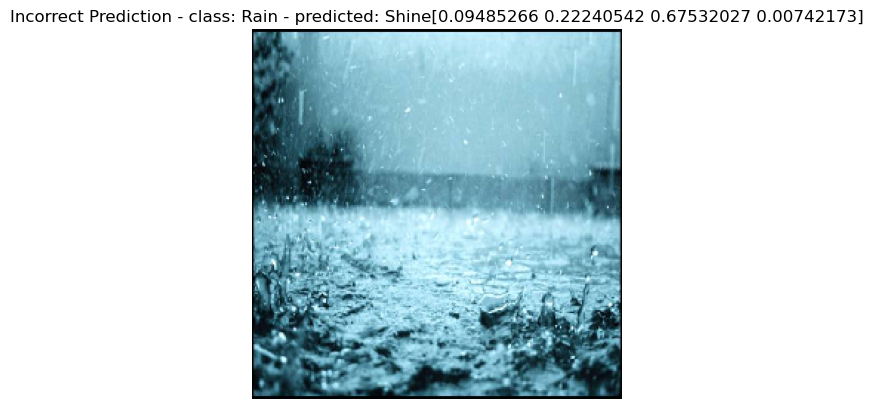

In [24]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

### The model attributed the wrong weather condition to 1 image out of 10. 